In [ ]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
transform= transforms.Compose([transforms.ToTensor()])
train_data= datasets.FashionMNIST(root='data',train=True,download=True,transform=transform)
test_data= datasets.FashionMNIST(root='data',train=False,download=True,transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.8MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
from torch.utils.data import DataLoader

batch_size =32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data,batch_size=batch_size)

In [ ]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


torch.Size([32, 1, 28, 28])
torch.Size([32])


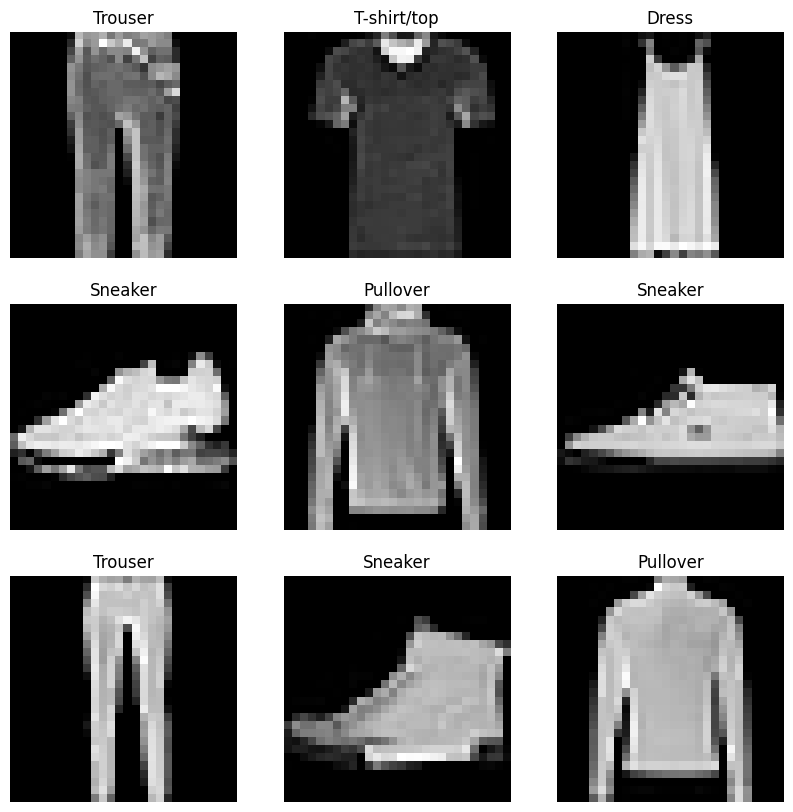

In [ ]:
images,labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i].squeeze(),cmap='gray')
  plt.title(class_names[labels[i]])
  plt.axis('off')
plt.show()


In [ ]:
class FashionClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten= nn.Flatten()
    self.fc1=nn.Linear(in_features=784,out_features=128)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(in_features=128,out_features=10)
  def forward(self,x):
    x=self.flatten(x)
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    return x


In [ ]:
model=FashionClassifier()
print(model)

FashionClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [ ]:
epochs = 100
for epoch in range(epochs):
  print(f"epoch{epoch+1}/{epochs}")
  model.train()
  train_loss = 0.0
  for batch, (X, y) in enumerate(train_loader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            print(f"  Batch {batch}, Loss: {loss.item():.4f}")


  print(f"Epoch {epoch+1} completed with average loss: {train_loss/len(train_loader):.4f}\n")

epoch1/100
  Batch 0, Loss: 2.3082
  Batch 100, Loss: 1.8816
  Batch 200, Loss: 1.4093
  Batch 300, Loss: 1.1719
  Batch 400, Loss: 1.0726
  Batch 500, Loss: 0.9758
  Batch 600, Loss: 0.9086
  Batch 700, Loss: 0.8617
  Batch 800, Loss: 0.6900
  Batch 900, Loss: 1.0353
  Batch 1000, Loss: 0.8511
  Batch 1100, Loss: 0.6233
  Batch 1200, Loss: 0.6179
  Batch 1300, Loss: 0.6858
  Batch 1400, Loss: 0.6204
  Batch 1500, Loss: 0.7373
  Batch 1600, Loss: 0.6414
  Batch 1700, Loss: 0.4605
  Batch 1800, Loss: 0.4442
Epoch 1 completed with average loss: 0.9115

epoch2/100
  Batch 0, Loss: 0.5114
  Batch 100, Loss: 0.5641
  Batch 200, Loss: 0.6117
  Batch 300, Loss: 0.4540
  Batch 400, Loss: 0.5274
  Batch 500, Loss: 0.4030
  Batch 600, Loss: 0.6494
  Batch 700, Loss: 0.4137
  Batch 800, Loss: 0.4879
  Batch 900, Loss: 0.5797
  Batch 1000, Loss: 0.4024
  Batch 1100, Loss: 0.5361
  Batch 1200, Loss: 0.5573
  Batch 1300, Loss: 0.6126
  Batch 1400, Loss: 0.5246
  Batch 1500, Loss: 0.5947
  Batch 1600

In [ ]:
# Set the model to evaluation mode
model.eval()

# Initialize variables to track test loss and correct predictions
test_loss = 0
correct_predictions = 0

# No need for gradients during evaluation
with torch.no_grad():
    for X_test, y_test in test_loader:
        # Forward pass: Get predictions
        y_pred = model(X_test)

        # Compute loss
        test_loss += loss_fn(y_pred, y_test).item()

        # Get the predicted class
        predicted_classes = y_pred.argmax(dim=1)

        # Count correct predictions
        correct_predictions += (predicted_classes == y_test).sum().item()

# Calculate average loss and accuracy
average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / len(test_loader.dataset)

print(f"Test Loss: {average_test_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Loss: 0.3225
Test Accuracy: 89.08%


In [ ]:

torch.save(model.state_dict(), "binary_classification_model.pth")
print("Model saved successfully!")


NameError: name 'torch' is not defined